In [9]:
#Visualization
import matplotlib.pyplot as plt

#File Handling
import scipy.io
from scipy.io import loadmat

#Computation
import numpy as np
from scipy import stats
from scipy import signal
from scipy import stats
from scipy.signal import butter, lfilter
from sklearn.metrics import mean_squared_error as mse



In [2]:
def rms (arr):
    return np.sqrt(np.mean(arr**2))
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [3]:
hg = loadmat('HG.mat')
hg = hg["HG"]
erp = loadmat('ERP.mat')
erp = erp["ERP"]

In [4]:
# Taking 0th electrode and averaging the signal 

hg_pt = np.mean(hg[0,0,0], axis=1)
hg_pr = np.mean(hg[0,1,0], axis=1)

hg_wt = np.mean(hg[1,0,0], axis=1)
hg_wr = np.mean(hg[1,1,0], axis=1)

time_ax = np.linspace(-200,1000,1201)

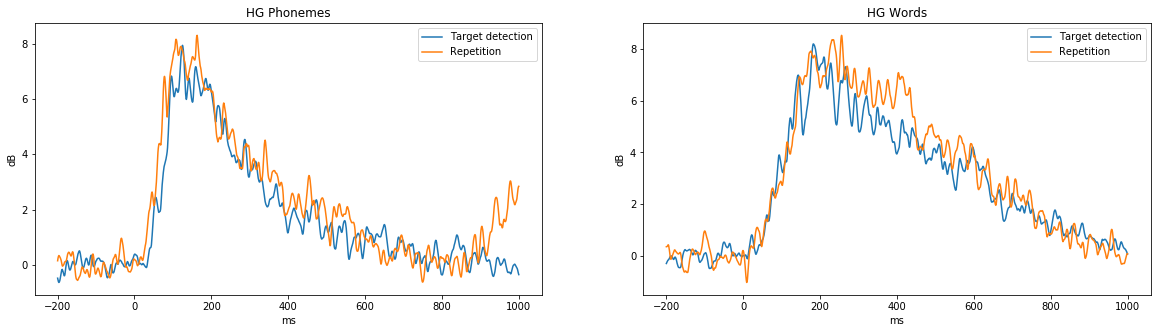

In [10]:
# Plotting

fig, (ax0, ax1) = plt.subplots(ncols = 2, figsize= (20,5))

ax0.plot(time_ax,hg_pt)
ax0.plot(time_ax,hg_pr)
ax0.legend(['Target detection','Repetition'],loc='upper right')
ax0.set_xlabel("ms")
ax0.set_ylabel("dB")
ax0.title.set_text('HG Phonemes')


ax1.plot(time_ax,hg_wt)
ax1.plot(time_ax,hg_wr)
ax1.legend(['Target detection','Repetition'],loc='upper right')
ax1.set_xlabel("ms")
ax1.set_ylabel("dB")
ax1.title.set_text('HG Words')
plt.show()


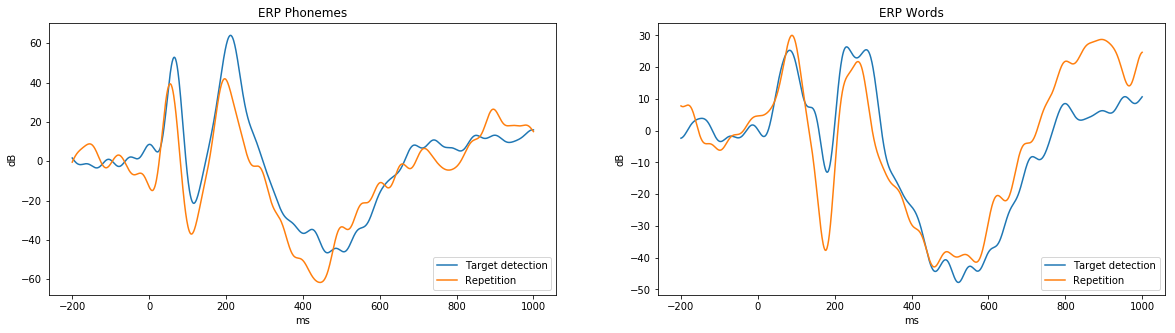

In [6]:
erp_pt = np.mean(erp[0,0,0], axis=1)
erp_pr = np.mean(erp[0,1,0], axis=1)

erp_wt = np.mean(erp[1,0,0], axis=1)
erp_wr = np.mean(erp[1,1,0], axis=1)

fig, (ax0, ax1) = plt.subplots(ncols = 2, figsize= (20,5))

ax0.plot(time_ax,erp_pt)
ax0.plot(time_ax,erp_pr)
ax0.legend(['Target detection','Repetition'],loc='lower right')
ax0.set_xlabel("ms")
ax0.set_ylabel("dB")
ax0.title.set_text('ERP Phonemes')

ax1.plot(time_ax,erp_wt)
ax1.plot(time_ax,erp_wr)
ax1.legend(['Target detection','Repetition'],loc='lower right')
ax1.set_xlabel("ms")
ax1.set_ylabel("dB")
ax1.title.set_text('ERP Words')
plt.show()

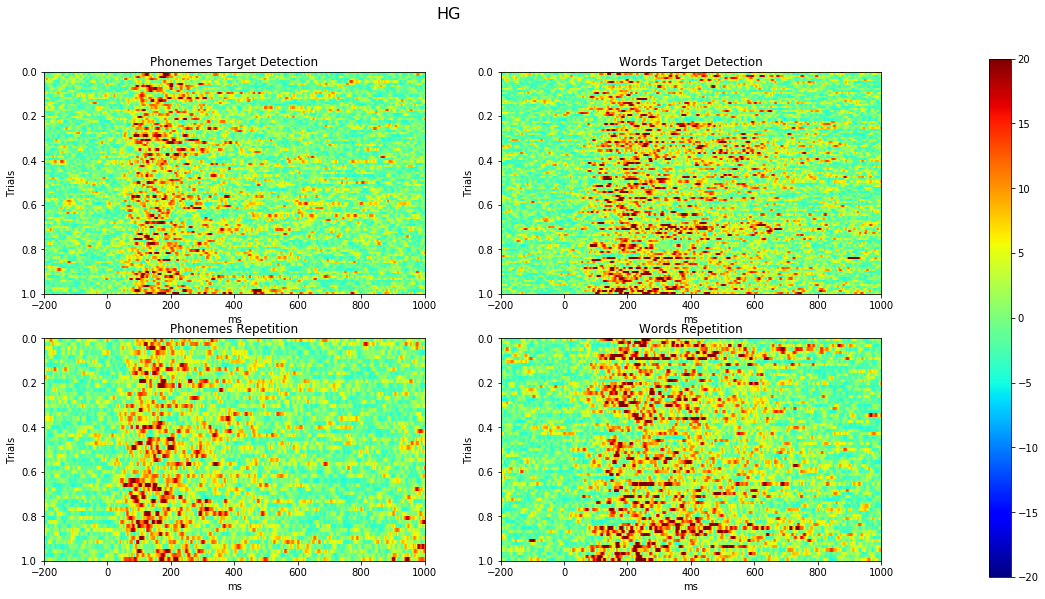

In [7]:
fig,ax = plt.subplots(2,2,figsize= (15,9))

im0 = ax[0][0].imshow(hg[0,0,0].T, cmap=plt.cm.jet,interpolation='nearest', aspect='auto',vmax = 20, vmin= -20,origin='lower',extent=[-200,1000,1,0])
ax[0][0].set_xlabel("ms")
ax[0][0].set_ylabel("Trials")
ax[0][0].title.set_text('Phonemes Target Detection')

im1 = ax[0][1].imshow(hg[1,0,0].T, cmap=plt.cm.jet,interpolation='nearest', aspect='auto',vmax = 20, vmin= -20,origin='lower',extent=[-200,1000,1,0])
ax[0][1].set_xlabel("ms")
ax[0][1].set_ylabel("Trials")
ax[0][1].title.set_text('Words Target Detection')

im2 = ax[1][0].imshow(hg[0,1,0].T, cmap=plt.cm.jet,interpolation='nearest', aspect='auto',vmax = 20, vmin= -20,origin='lower',extent=[-200,1000,1,0])
ax[1][0].set_xlabel("ms")
ax[1][0].set_ylabel("Trials")
ax[1][0].title.set_text('Phonemes Repetition')

im3 = ax[1][1].imshow(hg[1,1,0].T, cmap=plt.cm.jet,interpolation='nearest', aspect='auto',vmax = 20, vmin= -20,origin='lower',extent=[-200,1000,1,0])
ax[1][1].set_xlabel("ms")
ax[1][1].set_ylabel("Trials")
ax[1][1].title.set_text('Words Repetition')


cbaxes = fig.add_axes([1.0, 0.1, 0.02, 0.8]) 
fig.colorbar(im0,cax = cbaxes)
plt.suptitle("HG", size=16)
plt.show()

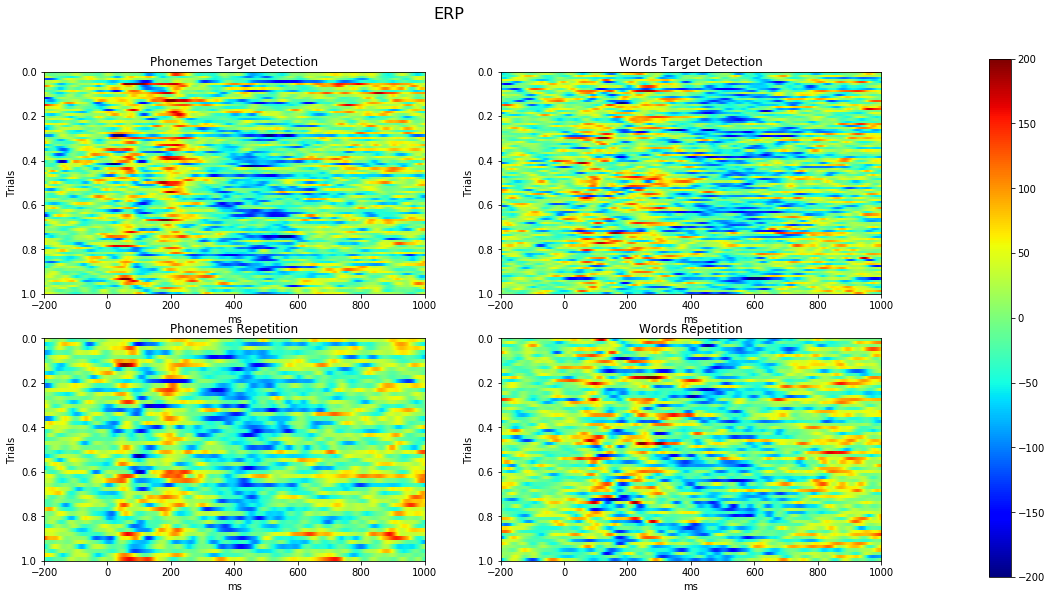

In [8]:
fig,ax = plt.subplots(2,2,figsize= (15,9))

im0 = ax[0][0].imshow(erp[0,0,0].T, cmap=plt.cm.jet,interpolation='nearest', aspect='auto',vmax = 200, vmin= -200,origin='lower',extent=[-200,1000,1,0])
ax[0][0].set_xlabel("ms")
ax[0][0].set_ylabel("Trials")
ax[0][0].title.set_text('Phonemes Target Detection')

im1 = ax[0][1].imshow(erp[1,0,0].T, cmap=plt.cm.jet,interpolation='nearest', aspect='auto',vmax = 200, vmin= -200,origin='lower',extent=[-200,1000,1,0])
ax[0][1].set_xlabel("ms")
ax[0][1].set_ylabel("Trials")
ax[0][1].title.set_text('Words Target Detection')

im2 = ax[1][0].imshow(erp[0,1,0].T, cmap=plt.cm.jet,interpolation='nearest', aspect='auto',vmax = 200, vmin= -200,origin='lower',extent=[-200,1000,1,0])
ax[1][0].set_xlabel("ms")
ax[1][0].set_ylabel("Trials")
ax[1][0].title.set_text('Phonemes Repetition')

im3 = ax[1][1].imshow(erp[1,1,0].T, cmap=plt.cm.jet,interpolation='nearest', aspect='auto',vmax = 200, vmin= -200,origin='lower',extent=[-200,1000,1,0])
ax[1][1].set_xlabel("ms")
ax[1][1].set_ylabel("Trials")
ax[1][1].title.set_text('Words Repetition')


cbaxes = fig.add_axes([1.0, 0.1, 0.02, 0.8]) 
fig.colorbar(im0,cax = cbaxes)
plt.suptitle("ERP", size=16)
plt.show()